#ANN (Artificial Neural Networks)

We saw that the Logistic Model is doing some decent work on classification.

Now its time to see the real power of Pytorch with ANNs.

We will use again MNIST dataset. All the preparation of the dataset is going into a one cell, because I did it back at the Logistic Notebook.

## Import libraries - Prepare the Dataset

In [1]:
!pip install opendatasets

In [2]:
import torch
import torch.nn as nn
from torch.autograd import Variable
from torch.utils.data import DataLoader

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split

#"username":"giorgospapadakis227",
#"key":"0d98fada57d63e3b60481c013c67e993"

import opendatasets as od

od.download("https://www.kaggle.com/competitions/digit-recognizer/data", force = True)

Please provide your Kaggle credentials to download this dataset. Learn more: http://bit.ly/kaggle-creds
Your Kaggle username: giorgospapadakis227
Your Kaggle Key: ··········


100%|██████████| 15.3M/15.3M [00:00<00:00, 116MB/s] 


Extracting archive ./digit-recognizer/digit-recognizer.zip to ./digit-recognizer


In [3]:
# load data with pands
train = pd.read_csv('/content/digit-recognizer/train.csv', dtype = np.float32)

# split data into features(pixels) and labels
targets_numpy = train.label.values
features_numpy = train.loc[:,train.columns != "label"].values/255# /255 to normalize the pixels

# split the train dataset into 80% train and test 20%
features_train, features_test, targets_train, targets_test = train_test_split(features_numpy,
                                                                             targets_numpy,
                                                                             test_size = 0.2,
                                                                             random_state = 42)

# Create Tensors
featuresTrain = torch.from_numpy(features_train)
targetsTrain = torch.from_numpy(targets_train).type(torch.LongTensor) # data type is long

featuresTest = torch.from_numpy(features_test)
targetsTest = torch.from_numpy(targets_test).type(torch.LongTensor) # data type is long

# Basic model parameters
batch_size = 100
n_iters = 10000
num_epochs = n_iters / (len(features_train) / batch_size)
num_epochs = int(num_epochs)

# Pytorch train and test sets
train = torch.utils.data.TensorDataset(featuresTrain,targetsTrain)
test = torch.utils.data.TensorDataset(featuresTest,targetsTest)

# data loader
train_loader = DataLoader(train, batch_size = batch_size, shuffle = False)
test_loader = DataLoader(test, batch_size = batch_size, shuffle = False)

## Define and construct the ANN Model

We will use the above structure for our model


* Fully Connencted Layer: 784 -> 150
    * ReLU as non - linearity

* Fully Connencted Layer: 150 -> 150
    * Tanh as non - linearity

* Fully Connencted Layer: 150 -> 150
    * ELU as non - linearity

* Fully Connencted Layer: 150 -> 10


In [8]:
class ANNModel(nn.Module):

  def __init__(self, input_dim, hidden_dim, output_dim):
        super(ANNModel, self).__init__()

        # Linear function 1: 784 --> 150
        self.fc1 = nn.Linear(input_dim, hidden_dim)
        # Non-linearity 1
        self.relu1 = nn.ReLU()

        # Linear function 2: 150 --> 150
        self.fc2 = nn.Linear(hidden_dim, hidden_dim)
        # Non-linearity 2
        self.tanh2 = nn.Tanh()

        # Linear function 3: 150 --> 150
        self.fc3 = nn.Linear(hidden_dim, hidden_dim)
        # Non-linearity 3
        self.elu3 = nn.ELU()

        # Linear function 4 (readout): 150 --> 10
        self.fc4 = nn.Linear(hidden_dim, output_dim)

  def forward(self, x):
    # Linear function 1
        out = self.fc1(x)
        # Non-linearity 1
        out = self.relu1(out)

        # Linear function 2
        out = self.fc2(out)
        # Non-linearity 2
        out = self.tanh2(out)

        # Linear function 2
        out = self.fc3(out)
        # Non-linearity 2
        out = self.elu3(out)

        # Linear function 4 (readout)
        out = self.fc4(out)
        return out

In [9]:
# instatiate ANN

input_dim = 28*28
hidden_dim = 150
output_dim = 10

# Create ANN
model = ANNModel(input_dim, hidden_dim, output_dim)

# Loss Function
error = nn.CrossEntropyLoss()

# Optimizer
learning_rate = 0.02
optimizer = torch.optim.SGD(model.parameters(), lr = learning_rate)

## Train model

In [10]:
count = 0
loss_list = []
iteration_list = []
accuracy_list = []
for epoch in range(num_epochs):
    for i, (images, labels) in enumerate(train_loader):

        train = Variable(images.view(-1, 28*28))
        labels = Variable(labels)

        # Clear gradients
        optimizer.zero_grad()

        # Forward propagation
        outputs = model(train)

        # Calculate softmax and ross entropy loss
        loss = error(outputs, labels)

        # Calculating gradients
        loss.backward()

        # Update parameters
        optimizer.step()

        count += 1

        if count % 50 == 0:
            # Calculate Accuracy
            correct = 0
            total = 0
            # Predict test dataset
            for images, labels in test_loader:

                test = Variable(images.view(-1, 28*28))

                # Forward propagation
                outputs = model(test)

                # Get predictions from the maximum value
                predicted = torch.max(outputs.data, 1)[1]

                # Total number of labels
                total += len(labels)

                # Total correct predictions
                correct += (predicted == labels).sum()

            accuracy = 100 * correct / float(total)

            # store loss and iteration
            loss_list.append(loss.data)
            iteration_list.append(count)
            accuracy_list.append(accuracy)
        if count % 500 == 0:
            # Print Loss
            print('Iteration: {}  Loss: {}  Accuracy: {} %'.format(count, loss.data, accuracy))


Iteration: 500  Loss: 0.8156417012214661  Accuracy: 77.52381134033203 %
Iteration: 1000  Loss: 0.43804657459259033  Accuracy: 87.57142639160156 %
Iteration: 1500  Loss: 0.2512649595737457  Accuracy: 89.46428680419922 %
Iteration: 2000  Loss: 0.293457955121994  Accuracy: 90.47618865966797 %
Iteration: 2500  Loss: 0.30820176005363464  Accuracy: 91.94047546386719 %
Iteration: 3000  Loss: 0.11718372255563736  Accuracy: 92.71428680419922 %
Iteration: 3500  Loss: 0.2538478970527649  Accuracy: 93.46428680419922 %
Iteration: 4000  Loss: 0.0687924325466156  Accuracy: 93.89286041259766 %
Iteration: 4500  Loss: 0.30306199193000793  Accuracy: 94.41666412353516 %
Iteration: 5000  Loss: 0.11159661412239075  Accuracy: 94.64286041259766 %
Iteration: 5500  Loss: 0.20511120557785034  Accuracy: 94.73809814453125 %
Iteration: 6000  Loss: 0.20337241888046265  Accuracy: 94.97618865966797 %
Iteration: 6500  Loss: 0.10652422904968262  Accuracy: 95.26190185546875 %
Iteration: 7000  Loss: 0.12422101944684982  A

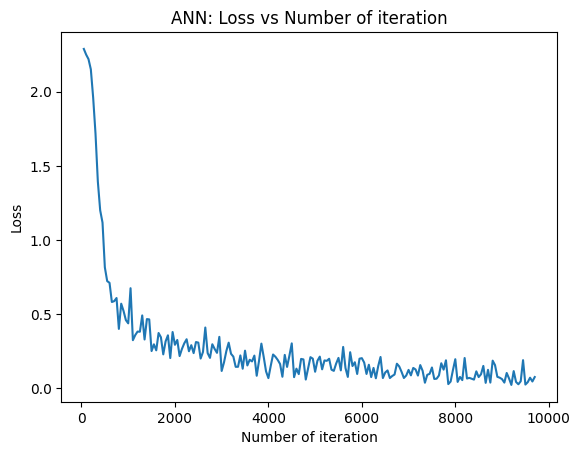

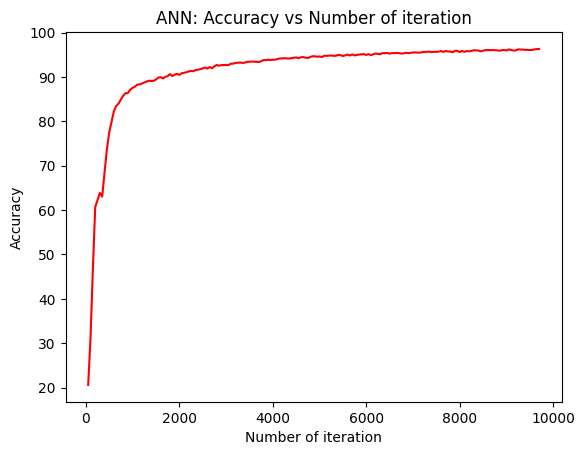

In [11]:
# visualization loss
plt.plot(iteration_list,loss_list)
plt.xlabel("Number of iteration")
plt.ylabel("Loss")
plt.title("ANN: Loss vs Number of iteration")
plt.show()

# visualization accuracy
plt.plot(iteration_list,accuracy_list,color = "red")
plt.xlabel("Number of iteration")
plt.ylabel("Accuracy")
plt.title("ANN: Accuracy vs Number of iteration")
plt.show()

## Predictions

In [12]:
for images, labels in test_loader:
  test = Variable(images.view(-1, 28*28))

  # Forward propagation
  outputs = model(test)

  # Get predictions from the maximum value
  predicted = torch.max(outputs.data, 1)[1]

for i in range(100):
  print('Predicted = {}, Real = {}'.format(predicted[i], labels[i]))

# Total correct predictions
correct += (predicted == labels).sum()

accuracy = 100 * correct / float(total)
print('Accuracy = ', accuracy.item())

Predicted = 7, Real = 7
Predicted = 9, Real = 9
Predicted = 5, Real = 5
Predicted = 1, Real = 1
Predicted = 0, Real = 0
Predicted = 1, Real = 1
Predicted = 0, Real = 9
Predicted = 2, Real = 2
Predicted = 4, Real = 4
Predicted = 4, Real = 4
Predicted = 2, Real = 2
Predicted = 0, Real = 0
Predicted = 1, Real = 1
Predicted = 0, Real = 0
Predicted = 3, Real = 3
Predicted = 7, Real = 7
Predicted = 2, Real = 2
Predicted = 8, Real = 8
Predicted = 2, Real = 2
Predicted = 7, Real = 7
Predicted = 2, Real = 2
Predicted = 6, Real = 8
Predicted = 0, Real = 0
Predicted = 7, Real = 7
Predicted = 6, Real = 6
Predicted = 8, Real = 8
Predicted = 5, Real = 5
Predicted = 5, Real = 5
Predicted = 5, Real = 5
Predicted = 2, Real = 2
Predicted = 5, Real = 5
Predicted = 0, Real = 0
Predicted = 5, Real = 5
Predicted = 1, Real = 1
Predicted = 1, Real = 1
Predicted = 8, Real = 8
Predicted = 0, Real = 0
Predicted = 8, Real = 8
Predicted = 3, Real = 3
Predicted = 3, Real = 3
Predicted = 5, Real = 5
Predicted = 8, R